In [1]:
import pandas as pd
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("dataset/preprocessed.csv")
df.shape

(762106, 44)

In [2]:
df = df.drop(df[df.target == -1].index)
df.shape

(762094, 44)

In [3]:
# Separate input features and target
y = df.target

In [4]:
X = df.drop('target', axis = 1)

In [5]:
# setting up testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 27)
y_test_3_class = ["Low" if x == 1 or x == 2 else "Medium" if x == 3  else 'High' for x in y_test]
y_train_3_class = ["Low" if i == 1 or i == 2 else "Medium" if i == 3  else 'High' for i in y_train]

### Train the model without re-sampling (5 - classes)

In [23]:
# Train the model

rfc = RandomForestClassifier(n_estimators = 100, n_jobs = -1).fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [24]:
# Performance results

print("Accuracy: \t", accuracy_score(y_test, rfc_pred))
print("F1 Score: \t", f1_score(y_test, rfc_pred, average = 'macro'))
print("Precision:\t", precision_score(y_test, rfc_pred, average = 'macro'))
print("Recall:   \t", recall_score(y_test, rfc_pred, average = 'macro'))

Accuracy: 	 0.538562070920199
F1 Score: 	 0.49362060507397076
Precision:	 0.49485217151380567
Recall:   	 0.49604627996597134


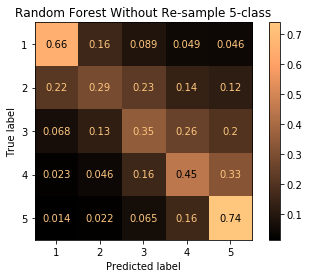

In [25]:
# Plot normalized confusion matrix

import matplotlib.pyplot as plt

classes = ["1", "2", "3", "4", "5"]
title = "Random Forest Without Re-sample 5-class"
disp = plot_confusion_matrix(rfc, X_test, y_test, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)
plt.show()

### Train the model without re-sampling (3 - classes)

In [9]:
# Train the model

rfc = RandomForestClassifier(n_estimators = 100, n_jobs = -1).fit(X_train, y_train_3_class)
rfc_pred = rfc.predict(X_test)

In [10]:
# Performance results

print("Accuracy: \t", accuracy_score(y_test_3_class, rfc_pred))
print("F1 Score: \t", f1_score(y_test_3_class, rfc_pred, average = 'macro'))
print("Precision:\t", precision_score(y_test_3_class, rfc_pred, average = 'macro'))
print("Recall:   \t", recall_score(y_test_3_class, rfc_pred, average = 'macro'))

Accuracy: 	 0.7322017173689404
F1 Score: 	 0.6168616996159987
Precision:	 0.6406490149438215
Recall:   	 0.61055934680182


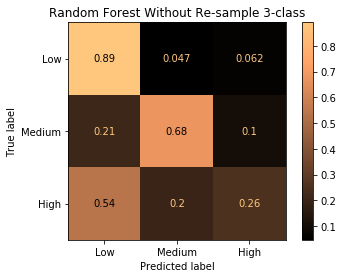

In [11]:
# Plot normalized confusion matrix

import matplotlib.pyplot as plt

classes = ["Low", "Medium", "High"]
title = "Random Forest Without Re-sample 3-class"
disp = plot_confusion_matrix(rfc, X_test, y_test_3_class, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)
plt.show()

### Train the model with re-sampling (5 - Classes)

In [12]:
# Re-sample the training set

sm = SMOTEENN(random_state = 27, n_jobs = -1)
X_train_sampled_5_class, y_train_sampled_5_class = sm.fit_sample(X_train, y_train)

In [13]:
print(X_train_sampled_5_class.shape)

(426472, 43)


In [14]:
# Train the model

rfc_sampled = RandomForestClassifier(n_estimators = 100, n_jobs = -1).fit(X_train_sampled_5_class, y_train_sampled_5_class)
rfc_sampled_pred = rfc_sampled.predict(X_test)

In [15]:
# Performance results

print("Accuracy: \t", accuracy_score(y_test, rfc_sampled_pred))
print("F1 Score: \t", f1_score(y_test, rfc_sampled_pred, average = 'macro'))
print("Precision:\t", precision_score(y_test, rfc_sampled_pred, average = 'macro'))
print("Recall:   \t", recall_score(y_test, rfc_sampled_pred, average = 'macro'))

Accuracy: 	 0.5315760744053243
F1 Score: 	 0.49552755701851686
Precision:	 0.48563387312863293
Recall:   	 0.516616830977954


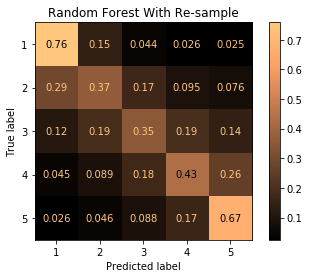

In [16]:
# Plot normalized confusion matrix

classes = ["1", "2", "3", "4", "5"]
title = "Random Forest With Re-sample"
disp = plot_confusion_matrix(rfc_sampled, X_test, y_test, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)
plt.show()

### Train the model with re-sampling (3 - Classes)

In [17]:
# Re-sample the training set

sm = SMOTEENN(random_state = 27, n_jobs = -1)
X_train_sampled_3_class, y_train_sampled_3_class = sm.fit_sample(X_train, y_train_3_class)

In [18]:
print(X_train_sampled_3_class.shape)

(589004, 43)


In [19]:
# Train the model

rfc_sampled = RandomForestClassifier(n_estimators = 100, n_jobs = -1).fit(X_train_sampled_3_class, y_train_sampled_3_class)
rfc_sampled_pred = rfc_sampled.predict(X_test)

In [20]:
# Performance results

print("Accuracy: \t", accuracy_score(y_test_3_class, rfc_sampled_pred))
print("F1 Score: \t", f1_score(y_test_3_class, rfc_sampled_pred, average = 'macro'))
print("Precision:\t", precision_score(y_test_3_class, rfc_sampled_pred, average = 'macro'))
print("Recall:   \t", recall_score(y_test_3_class, rfc_sampled_pred, average = 'macro'))

Accuracy: 	 0.7093332073649514
F1 Score: 	 0.6409748808911516
Precision:	 0.6322314166399473
Recall:   	 0.654221754126946


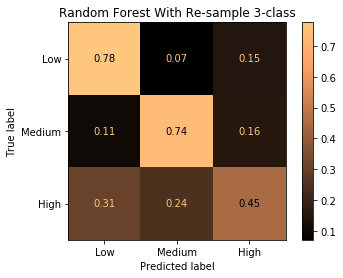

In [21]:
# Plot normalized confusion matrix

classes = ["Low", "Medium", "High"]
title = "Random Forest With Re-sample 3-class"
disp = plot_confusion_matrix(rfc_sampled, X_test, y_test_3_class, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)
plt.show()
